In [59]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import json

In [60]:
original_img = cv2.imread("../neus_data/images/000004.jpg", 1) # BGR
print(original_img.shape)

(2160, 3840, 3)


In [61]:
# scaled_img = cv2.resize(original_img, (1920, 1080))

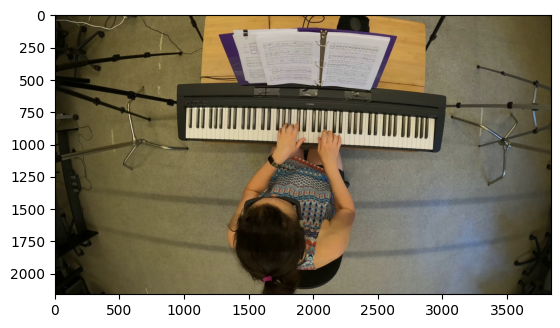

In [62]:
RGB_original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
# RGB_original_img = cv2.cvtColor(scaled_img, cv2.COLOR_BGR2RGB)
# RGB_oritinal_img = original_img[:,:,::-1]
plt.imshow(RGB_original_img)
plt.show()

In [63]:
print(RGB_original_img.shape)

(2160, 3840, 3)


In [64]:
intri_file = "gp05.json"
with open(intri_file, 'r') as file:
    param = json.load(file)

In [65]:
# Parameter for undistortion
width = int(param['width'])
height = int(param['height'])
new_size = (width, height)

In [66]:
print(width)
print(height)

3840
2160


In [67]:
K = np.array([[float(param['f']), 0.0, width/2-float(param['cx'])],
              [0.0, float(param['f']), height/2-float(param['cy'])],
              [0.0, 0.0, 1.0]])
K_new = K.copy()
print(K)

[[1.799177e+03 0.000000e+00 1.920000e+03]
 [0.000000e+00 1.799177e+03 1.080000e+03]
 [0.000000e+00 0.000000e+00 1.000000e+00]]


In [68]:
# D = np.array([float(param['k1']), float(param['k2']), float(param['k3']), 0.0])
D = np.array([float(param['k1']), float(param['k2']), float(param['k3']), float(param['k4'])])
print(D)

[ 0.036902  0.057131 -0.057154  0.018458]


In [69]:
pad = 0

In [70]:
# if param['cam_uid'] in ['gp05']:
#     K_new[:2, -1] = K_new[:2, -1] + pad
#     new_size = (width+2*pad, height+2*pad)
#     param['width'] = str(width+2*pad)
#     param['height'] = str(height+2*pad)
# else:
#     # K_new[0, -1] = K_new[0, -1] - pad
#     K_new[:2, -1] = K_new[:2, -1] + pad
#     new_size = (width+2*pad, height+2*pad)
#     param['width'] = str(width+2*pad)
#     param['height'] = str(height+2*pad)

In [71]:
K_new[:2, -1] = K_new[:2, -1] + pad
new_size = (width+2*pad, height+2*pad)
param['width'] = str(width+2*pad)
param['height'] = str(height+2*pad)

In [72]:
img_undistorted = cv2.fisheye.undistortImage(RGB_original_img, K, D=D, Knew=K_new, new_size=new_size)

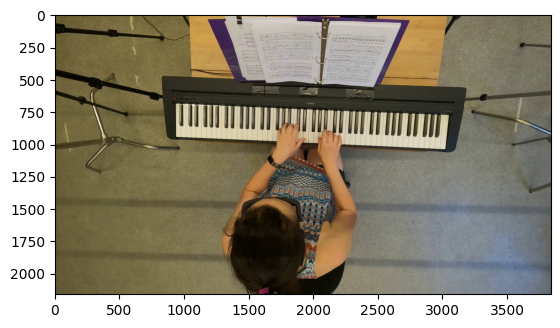

In [73]:
plt.imshow(img_undistorted)
plt.show()

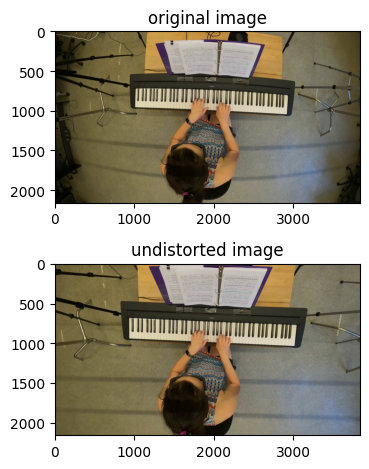

In [74]:
fig = plt.figure()

ax1 = plt.subplot(2, 1, 1)
plt.imshow(RGB_original_img)
plt.title("original image")

ax2 = plt.subplot(2, 1, 2)
plt.imshow(img_undistorted)
plt.title("undistorted image")

plt.tight_layout()

In [75]:
print(img_undistorted.shape)

(2160, 3840, 3)


In [76]:
param

{'cam_uid': 'gp05',
 'width': '3840',
 'height': '2160',
 'f': 1799.177002,
 'cx': 0.0,
 'cy': 0.0,
 'k1': 0.036902,
 'k2': 0.057131,
 'k3': -0.057154,
 'k4': 0.018458}

In [77]:
img_undistorted = cv2.cvtColor(img_undistorted, cv2.COLOR_RGB2BGR)
cv2.imwrite("000004.jpg", img_undistorted)

True